In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid


# Configs

In [11]:
torch.manual_seed(42)
DEVICE = torch.device("mps")
torch.use_deterministic_algorithms(True)

## Create datasets

Hymenoptera dataset: https://www.kaggle.com/datasets/ajayrana/hymenoptera-data

In [12]:
train_data = datasets.ImageFolder(
    "data/hymenoptera_data/train",
    transform=transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.490, 0.449, 0.411], 
            [0.231, 0.221, 0.230]
        )
    ])
)

val_data = datasets.ImageFolder(
    "data/hymenoptera_data/val",
    transform=transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.490, 0.449, 0.411], 
            [0.231, 0.221, 0.230]
        )
    ])
)

In [13]:
train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=8, shuffle=True)

In [14]:
len(train_data), len(val_data)

(244, 153)

In [15]:
classes = train_data.classes
classes

['ants', 'bees']

## Visualise some examples

In [16]:
def image_show(img: torch.Tensor, y: torch.Tensor, figsize: tuple[int, int] =(10, 10)):
    """
    Display an image with its corresponding label.

    Args:
        img: The image tensor to be displayed.
        y: The label(s) corresponding to the image.
        figsize: The size of the figure. Defaults to (10, 10).
    """
    pass
    np_img = img.numpy().transpose((1, 2, 0))
    avg = np.array([0.490, 0.449, 0.411])
    stddev = np.array([0.231, 0.221, 0.230])
    np_img = stddev * np_img + avg
    np_img = np.clip(np_img, 0, 1)
    plt.figure(figsize=figsize)
    plt.imshow(np_img)
    plt.title([classes[i] for i in y])



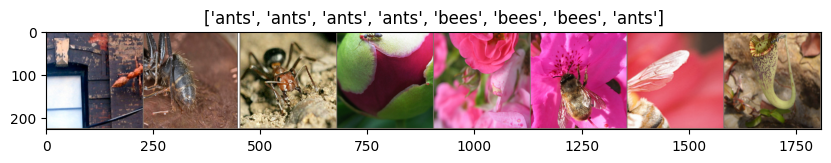

In [17]:
X, y = next(iter(train_dataloader))

image_show(make_grid(X, nrow=8), y)